# Risk Neutral Pricing


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

%matplotlib inline

Here I will be discussing Girsanov's theorem and its application to risk-neutral pricing.

Girsanov's theorem deals with the change of measure in the context of stochastic processes. Let's assume we a stochastic process, $X_{t}$, under a certain probability measure $\mathbb{P}$. Now, if we wish to change our probability measure to a new measure $\mathbb{Q}$, Girsanov's theorem provides the conditions under which a new process can be identified that is a Brownian motion under the new measure $\mathbb{Q}$.

This is quite abstract, so in simpler terms: Girsanov's theorem tells us how to "tilt" or "change" the drift of a stochastic process (like a stock price) under one probability measure to make it look like a standard Brownian motion under another probability measure. This is done by "re-weighting" the probability off path realisations of $X_{t}$ so under the measure $\mathbb{Q}$ the law of the process resembles that of the Wiener process.

## Real-World and Risk-Neutral Measures

Once we have modelled the distribution of the underlying, we have a probability measure $\mathbb{P}$ which reflects the "real-world" probabilities of realisations of the underlying index. 

The risk neutral measure, $\mathbb{Q}$, is a new measure for which the expected return of the index is assumed to be the risk-free rate (e.g. the interest rate of a short-term government bond, in the US this is currently $4.135\%$). The real-world ups and downs of the stock are still present but they are adjusted so that, on average, the stock grows at this risk-free rate. The risk-free measure simplifies the pricing of derivatives, under this measure, the expected payoff of a derivative is found using the risk-free rate, this helps ensure no arbitrage opportunities exist in the market. Simply, it helps in finding a fair price of a derivative such that no one can make a risk free profit.  

Adjusting the probabilities of realisatiions might appear counter-intuiative initially, different market participants will have varying opinions of the future and therefore different real-world measures forward in time. Adjusting these probabilities allows for a common framework of pricing derivatives for market participants to engage with. Furthermore, it means the writer of the derivatives contract does not need to take a position on the direction the underlying will move.

## Example of finding the Risk-Neutral Measure

For example, consider the two processes, $X_{t}^{(1)} = W_{t}$ and $X_{t}^{(2)} = 1.5 t + 0.6 W_{t}$ driven by the same underlying Brownian motion. 

/tmp/ipykernel_29007/3034515138.py:45: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data = np.random.normal(0, 1, size = 50_000), vertical=True, ax=ax, fill=True, legend=False)
/tmp/ipykernel_29007/3034515138.py:46: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data = np.random.normal(loc=1.5, scale=0.6, size = 50_000), vertical=True, ax=ax, fill=True, legend=False)
/tmp/ipykernel_29007/3034515138.py:58: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


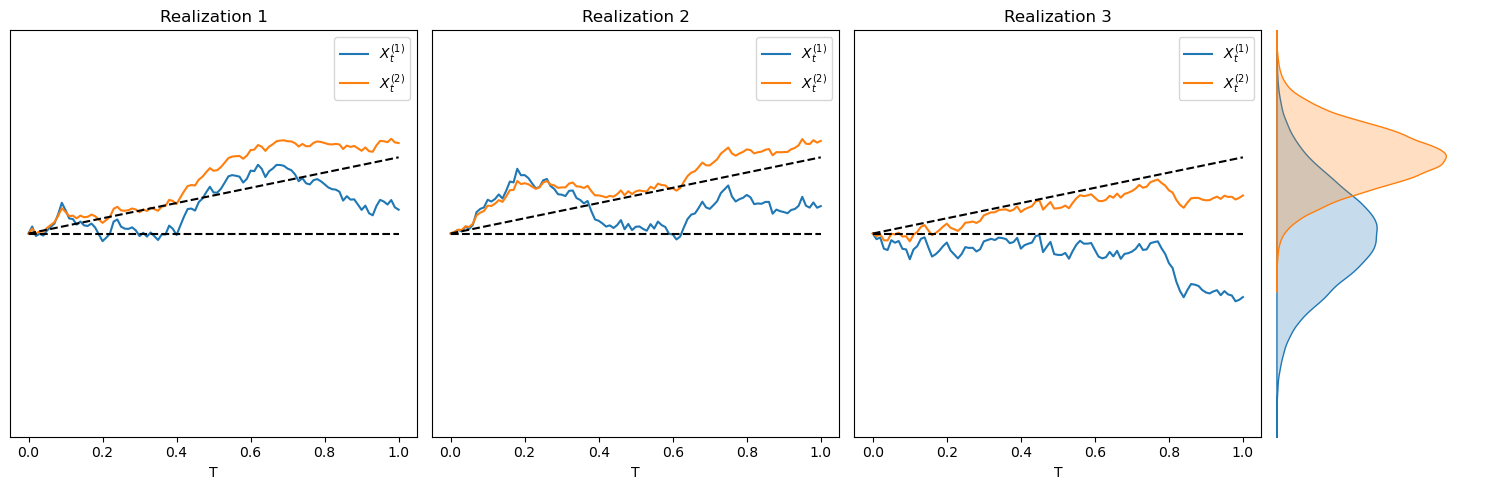

In [3]:
def brownian_motion(N, T=1):
    """
    Simulate a Brownian motion.
    :param N: Number of time steps
    :param T: Total time
    :return: Brownian motion path
    """
    dt = T/N
    dW = np.sqrt(dt) * np.random.randn(N)
    W = np.cumsum(dW)
    return np.insert(W, 0, 0)  # Start at 0

# Number of time steps
N = 100

# Simulate three Brownian motions
paths = [brownian_motion(N) for _ in range(3)]

# Plotting
fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 4, width_ratios=[2, 2, 2, 1])  # This sets the desired width ratios

# Create subplots based on the gridspec
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharey=ax0)
ax2 = plt.subplot(gs[2], sharey=ax0)
ax3 = plt.subplot(gs[3], sharey=ax0)
axs = [ax0, ax1, ax2, ax3]

for i in range(3):
    axs[i].plot(np.linspace(0, 1, N+1), paths[i], label=f"$X_t^{{(1)}}$")

    axs[i].plot(np.linspace(0, 1, N+1), 1.5 * np.linspace(0, 1, N+1) + 0.6 * paths[i], label=f"$X_t^{{(2)}}$")
    axs[i].set_title(f"Realization {i+1}")
    axs[i].set_xlabel('T')
    axs[i].set_ylim(-4, 4)
    axs[i].legend()
    axs[i].plot([0, 1], [0, 0], linestyle='--', c='k')
    axs[i].plot([0, 1], [0, 1.5], linestyle='--', c='k')

ax = axs[3].twinx()
ax.set_ylim(axs[3].get_ylim())
ax.set_xlim(0, 0.8)

sns.kdeplot(data = np.random.normal(0, 1, size = 50_000), vertical=True, ax=ax, fill=True, legend=False)
sns.kdeplot(data = np.random.normal(loc=1.5, scale=0.6, size = 50_000), vertical=True, ax=ax, fill=True, legend=False)
ax.set_yticks([])
axs[3].set_xticks([])
axs[3].set_yticks([])

for spine in axs[3].spines.values():
    spine.set_visible(False)

for spine in ax.spines.values():
    spine.set_visible(False)

fig.tight_layout()
fig.show()

Each of these processes follow a distribution which is absolutely continuous with respect to the Lebesgue measure on $\mathbb{R}$. For the first process, this is $X_{t}^{(1)} \sim N(0, t)$ and $X_{t}^{(2)} \sim N(1.5 t, 0.6^{2}t)$. We want to find an alternative measure (which redistributes probability density) and under this measure we wish $X_{t}^{(2)}$ to be a standard brownian motion.

Let's say this first space is under the probability measure $\mathbb{P}$ and that we aim to construct a new space $\mathbb{Q}$ such that $X_{t}^{(2)}$ behaves like a standard brownian motion, therefore $X_{t}^{(1)}$ will have a negative drift under $\mathbb{Q}$.    

The processes $X_{t}^{(1)}, X_{t}^{(2)}$ are common between the two spaces, their sample paths just have different probabilities. Under $\mathbb{Q}$ we want $X_{t}$ to have zero mean. Let ${W}^{\mathbb{Q}}_{t}$ be the standard Wiener process under $\mathbb{Q}$. We make the following manipulation:

$$ X_{t}^{(2)} = 1.5 t + 0.6 W_{t} = 0.6 \left( \frac{1.5}{0.6} t + W_{t} \right) := 0.6 W_{t}^{\mathbb{Q}}.$$

Furthermore, 

$$ \left( \frac{1.5}{0.6}t + W_{t} \right) = W_{t}^{\mathbb{Q}} \implies -\frac{1.5}{0.6}t + W^{\mathbb{Q}}_{t} = W_{t} = X_{t}^{(1)} \implies X_{t}^{(1)} = -2.5t + W^{\mathbb{Q}}_{t}. $$

So under the risk-free measure (taking interest rates to be $0$), the standard brownian motion under $\mathbb{P}$ now has negative drift under $\mathbb{Q}$.

/tmp/ipykernel_29007/1966192123.py:30: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data = np.random.normal(0, 0.6, size = 50_000), vertical=True, ax=ax, fill=True, legend=False)
/tmp/ipykernel_29007/1966192123.py:31: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data = np.random.normal(loc=-2.5, scale=1, size = 50_000), vertical=True, ax=ax, fill=True, legend=False)
/tmp/ipykernel_29007/1966192123.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


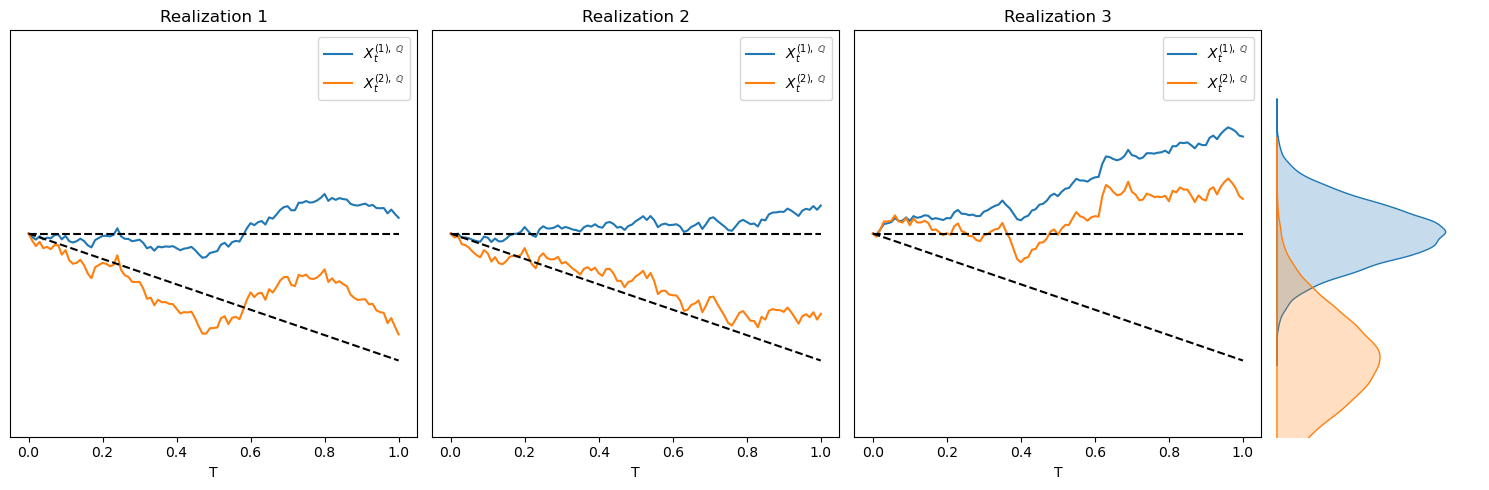

In [4]:
# Simulate three Brownian motions
paths = [brownian_motion(N) for _ in range(3)]

# Plotting
fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 4, width_ratios=[2, 2, 2, 1])  # This sets the desired width ratios

# Create subplots based on the gridspec
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharey=ax0)
ax2 = plt.subplot(gs[2], sharey=ax0)
ax3 = plt.subplot(gs[3], sharey=ax0)
axs = [ax0, ax1, ax2, ax3]

for i in range(3):
    axs[i].plot(np.linspace(0, 1, N+1), 0.6 * paths[i], label=f"$X_t^{{(1),~\mathbb{{Q}}}}$")

    axs[i].plot(np.linspace(0, 1, N+1), -2.5 * np.linspace(0, 1, N+1) + paths[i], label=f"$X_t^{{(2),~\mathbb{{Q}}}}$")
    axs[i].set_title(f"Realization {i+1}")
    axs[i].set_xlabel('T')
    axs[i].set_ylim(-4, 4)
    axs[i].legend()
    axs[i].plot([0, 1], [0, 0], linestyle='--', c='k')
    axs[i].plot([0, 1], [0, -2.5], linestyle='--', c='k')

ax = axs[3].twinx()
ax.set_ylim(axs[3].get_ylim())
ax.set_xlim(0, 0.8)

sns.kdeplot(data = np.random.normal(0, 0.6, size = 50_000), vertical=True, ax=ax, fill=True, legend=False)
sns.kdeplot(data = np.random.normal(loc=-2.5, scale=1, size = 50_000), vertical=True, ax=ax, fill=True, legend=False)
ax.set_yticks([])
axs[3].set_xticks([])
axs[3].set_yticks([])

for spine in axs[3].spines.values():
    spine.set_visible(False)

for spine in ax.spines.values():
    spine.set_visible(False)

fig.tight_layout()
fig.show()

What we have done here is maintained the two processes but increased the probabilities of realisations taking lower values (such that the expectaton of $X_{t}^{(2)} is 0) by introducing a new probability measure $\mathbb{Q}$. Considering the process $X_{1}^{(1)}$, we can see how the probabilies have been scaled by considering the following quantity:
$$ f(x, t) = \frac{p_{\mathbb{Q}}(X_{t}^{(2)})}{p_{\mathbb{P}}(X_{t}^{(2)})} $$

At time $t = 1$.

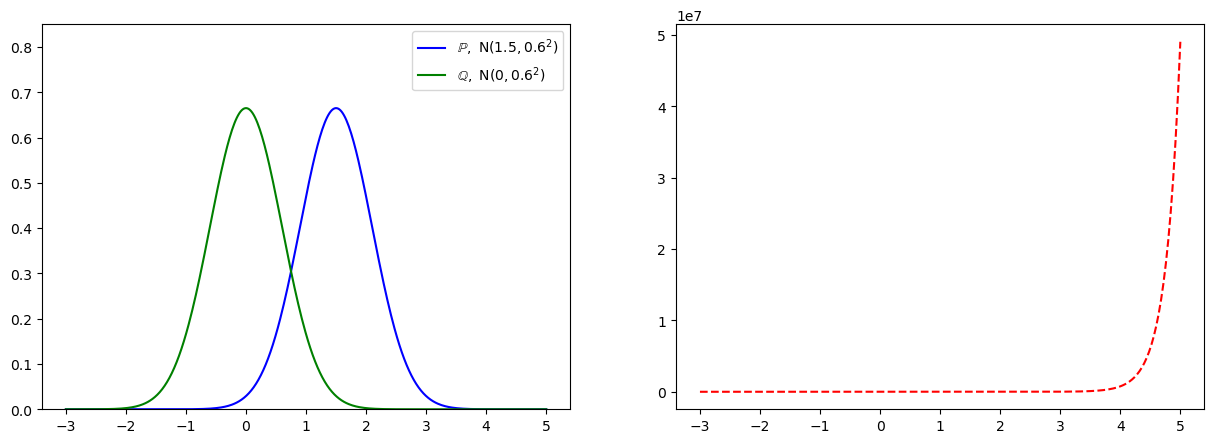

In [5]:
def pdf_normal(x, mu, sigma):
    """Probability density function of a normal distribution."""
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

def ratio_of_densities(x):
    """Compute the ratio of densities of N(1.5, 0.6^2) to N(0, 0.6^2) at the given x."""
    pdf_1 = pdf_normal(x, 1.5, 0.6)
    pdf_2 = pdf_normal(x, 0, 0.6)
    return pdf_1 / pdf_2

# Generate x values
x_vals = np.linspace(-3, 5, 400)

# Compute the densities and the ratio
pdf1_vals = [pdf_normal(x, 1.5, 0.6) for x in x_vals]
pdf2_vals = [pdf_normal(x, 0, 0.6) for x in x_vals]
ratio_vals = [ratio_of_densities(x) for x in x_vals]

# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(x_vals, pdf1_vals, label=f"$\mathbb{{P}},~$N$(1.5, 0.6^{2})$", color="blue")
axs[0].plot(x_vals, pdf2_vals, label=f"$\mathbb{{Q}},~$N$(0, 0.6^{2})$", color="green")
axs[0].set_ylim(0, 0.85)
axs[0].legend()

axs[1].plot(x_vals, ratio_vals, label="Ratio of densities", color="red", linestyle="--")
plt.show()


## Girsanov's Theorem


### Filtrations

A filtration on $(\Omega, \mathcal{F})$ is an increasing family $\mathcal{M} = \{ \mathcal{M_t} \}_{t \geq 0}$ of sub $\sigma$-algebras, $\mathcal{M_t} \subseteq \mathcal{F}$, such that $0\leq s \leq t \implies \mathcal{M_s} \subseteq \mathcal{M_t}$.

A sigma algebra is a set of measurable sets under a probability measure, it represents the events for which we know how to assign a probability to. It can also be interpreted as the information we have about the process. Take a die for example, we know how to assign probabilities to the outcome of a roll but the underlying stochastic physical dynamics which determine the outcome we cannot reason about and assign probabilities to. 

A process $\{X_{t}\}$ on $(\Omega, \mathcal{F})$ is adapted to the filtration $\{F_{t}\}$ if $X_{t}$ is $F_{t}$-measurable for each $t$.

Intuiatively, a process is adapted to a filtration if we can reason about probabilities of outcomes of a process knowing information contained in the filtration. 

The natural filtration $\mathcal{F}_{t}^{0}$ of a process, $X_{t}$ is the smallest filtration such that the process is adapted. $\mathcal{F}_{t}^{0} = \sigma(X_{s},~s\leq t)$.

Thinking of a sigma algebra as observable information about a process, the natural filtration is the information we have about the history of a process. 

Ignoring some overly technical details, a stochatic process, $X_{t}$, is martingale with respect to a filtration $\mathcal{M_t}$ providing that $\forall s \leq t,~\mathbb{E}[X_{t} | \mathcal{M}_{s}] = X_{s}$. That is, given the history of this process up to a time $s$, the expectation of the process in future is the realisation of the process at time $s$.

### Formal statement of Girsanov's Theorem

Under some mild conditions, this process of finding a new probability measure exists more generally.    

Let $W(t)$ be a standard Brownian motion under probability measure $P$ on a filtered probability space $(\Omega, \mathcal{F}, \{\mathcal{F}_t\}, P)$. Let

$$ dX_{t} = \theta(t) dt + dW_{t} \Leftrightarrow X(t) = \int_0^t \theta(s) \, ds + W(t) $$

where $\theta(\cdot)$ is predictable and satisfies

$$ \mathbb{E}\left[\int_0^T \theta^2(s) \, ds\right] < \infty \quad \text{for all } T > 0. $$

Then, there exists a unique probability measure $Q$ equivalent to $P$ such that

$$ \frac{dQ}{dP} = \exp\left( -\int_0^T \theta(s) \, dW(s) - \frac{1}{2} \int_0^T \theta^2(s) \, ds \right) $$
on $\mathcal{F}_T$ for each $T > 0$, and $X(t)$ is a standard Brownian motion under $Q$. This is exactly the Radon-Nikodym derivative of the measure.

We can see that this exactly holds in our example, as under the original measure, 
$$ d\mathbb{P}(W_{t}) = \frac{1}{\sigma \sqrt{2\pi}} e^{ - \frac{(W_{t})^2}{2}} $$

Therefore, we find using our transformation

$$ dQ(W_{t}) = \frac{1}{\sigma \sqrt{2\pi}} e^{ - \frac{(W_{t} - 2.5 t)^2}{2}} $$

Using the Radon-Nikodym derivative, we find:

$$ dQ(W_{t}) =  \frac{dQ}{dP} \cdot dP(W_{t}) = \exp\left( -\int_0^T \theta(s) \, dW(s) - \frac{1}{2} \int_0^T \theta^2(s) \, ds \right) \cdot dP(W_{t}) = \exp\left( -2.5W_{t} - \frac{1}{2} 2.5^{2} t \right) \cdot dP(W_{t}) = \frac{1}{\sigma \sqrt{2\pi}} e^{ - \frac{(W_{t} - 2.5 t)^2}{2}}.$$


## Application of Girsanov's Theorem in Derivative Pricing

Let's assume we have an index which varies according to Geometric Brownian Motion, like in the Black-Scholes formula:

$$ dS_{t} = \mu S_{t} dt + \sigma S_{t} dW_{t}. $$

Let these path realisations be such under the "real-world" measure $\mathbb{P}$. To be explicit we will say the Brownian increments are such under this measure, 
$ dS_{t} = \mu S_{t} dt + \sigma S_{t} dW_{t}^{\mathbb{P}}.$ Under the risk-free measure, $\mathbb{Q}$ we wish for the growth to be the risk free rate, $r$, that is,

$$ dS_{t} = rS_{t} dt + \sigma S_{t}dW_{t}^{\mathbb{Q}}. $$

Under Girsanov's Theorem we have, $dW_{t}^{\mathbb{P}} = \theta dt + dW_{t}^{\mathbb{Q}}$.

$$ dS_{t} = \mu S_{t} dt + \sigma S_{t}dW_{t}^{\mathbb{P}} = \mu S_{t} dt + \sigma S_{t} \left( \theta dt + dW_{t}^{\mathbb{Q}} \right) = (\mu + \sigma \theta) S_{t} dt + \sigma S_{t} dW_{t}^{\mathbb{Q}} = rS_{t} dt + \sigma S_{t}dW_{t}^{\mathbb{Q}}. $$

Matching the co-efficients of the drift term,

$$ (\mu + \sigma \theta) = r \implies \theta = \frac{r - \mu}{\sigma}. $$

Theta is the change in drift we require when switching from the real-world measure $\mathbb{P}$ to the risk-neutral measure $\mathbb{Q}$, it essentially drifts the random brownian increments so they pull the stock index down under the risk-neutral measure. This is why our path realisations of $S_{t}$ under the risk-measure, $dS_{t} = \mu dt + \sigma dW_{t}^{\mathbb{Q}}$ has drift $r$, the risk-free rate.

### Pricing of European-Style Options

For a European call option with maturity $T$ and strike $K$ on the index, the payoff at maturity is:
$$\text{Payoff} = \max(S_{T}−K,0)$$
The present value of this option is given by the expected value of its discounted (due to the time depreciation of money) future payoff. Under the risk-neutral measure $\mathbb{Q}$, this is:

$$ C(S_t, t) = e^{-r(T-t)} \mathbb{E_Q}[\max(S_T - K, 0)|S_t] = e^{-r(T-t)} \mathbb{E_P}\left[\frac{d\mathbb{Q}(S_{T})}{d\mathbb{P}(S_{T})}\cdot \max(S_T - K, 0)|S_t \right].$$

This expectation is taken under the risk-neutral measure $\mathbb{Q}$, which we can approximate with Monte-Carlo simulations. Furthermore, using the Radon-Nikodyn derivative derived from Girsanov's Theorem we can get the same result using a Monte-Carlo simulations of the real-world process, weighted by the Radon-Nikodyn  derivative. 

## Application to Weather Derivatives

For weather derivatives, the application of Girsanov's theorem to risk neutral pricing is less straight forward. This is primarily because weathers form an incomplete market - which means some risks cannot be hedged away as necessary financial instruments do not exist. In the context of weather derivatives, the underlying index is a meterological condition, such as rainfall (mm) or degree days, which cannot be traded directly. Furthermore, there is a historical and seasomall trend in the drift of the underlying, therefore assuming the underlying drifts at the risk free rate is non-sensical. Instead, we can construct a \`risk-free\` portfolio by introducing a new term, $\lambda$, which represents the so-called Market Price of Risk.

### Sharpe Ratio / Market Price of Risk

The Sharpe Ratio or market price of risk is given by    

$$ \lambda = \frac{\mathbb{E}\left[R_{m} - R_{r}\right]}{\sigma} $$

This is the ratio to expected return above the market, divided by the volatility of the asset. So if the Sharpe ratio is high it implies the asset is expected to outperform the market with a lower volatility, and therefore risk. If the Sharpe ratio is low, then the expected returns are lower or the asset is percieved as more risk or volatile.

If the Sharpe Ratio is greater than zero then, based on our models, we would expect that the index will outperform the risk free rate. If the Sharpe Ratio is less than zero then we expect the investment is underperforming the risk-free rate at the expense of taking on risk. These portfolios will be used for diversification or hedging risks, such as out of the money options.



### Risk-Free Process

One proposal for risk free pricing includes a constant market price of risk $\lambda$ [1]. This modifies our temperature process as follows, 

$$ \text{Under the real-world measure } \mathbb{P}: dX_{t} = \left[\frac{d \mu(t)}{dt} + \alpha(X_{t} - \mu_{t})  \right]dt + \sigma_{t} dW_{t}^{\mathbb{P}} $$

$$ \text{Under the risk-free measure } \mathbb{Q}: dX_{t} = \left[\frac{d \mu(t)}{dt} + \alpha(X_{t} - \mu_{t}) + \lambda \sigma_{t} \right]dt + \sigma_{t} dW_{t}^{\mathbb{Q}} $$

Which implies

$$dW_{t}^{\mathbb{P}} = \lambda dt + dW_{t}^{\mathbb{Q}} $$

Consider pricing weather derivatives contracts over heating degree days in the winter season.

If $\lambda > 0$: then, under the risk-free metric, our model will push the trend up marginally (depending on the magnitude of $\lambda$). This makes heating degree less likely under the model and therefore the risk-free payoff will be lower than the real-world payoff, lowering the contract value.

If $\lambda < 0$ then, under the risk-free metric, our model will push the trend down, this makes heating degree days more likely and the expected payoff of the contract will be higher under this measure, therefore the value of the contract will be higher and sold for more in comparison to evaluation under the real-world measure. This helps insurers cover some of their risk.

We can solve the stochastic differential equation under the risk-free measure, taking the market price of risk to be a function of time, $\lambda(t)$:

\begin{align*}
    & dX_{t} = \left[\dot{\mu}(t) + \alpha (\mu(t) - X_{t}) + \lambda(t) \sigma(t) \right] dt + \sigma(t) dW_{t}, \\
    & dY_{t} = \left[\alpha X_{t} e^{\alpha t} + \alpha e^{\alpha t} \left(\mu(t) - X_{t}\right) + e^{\alpha t} \dot{\mu}(t) + e^{\alpha t} \lambda(t) \sigma(t) \right] dt + \sigma(t) e^{\alpha t} dW_{t}, & (\text{Itô's Lemma, } Y_{t} = X_{t}e^{\alpha t}) \\
    & dY_{t} = \left[\alpha e^{\alpha t}\mu(t) + e^{\alpha t} \dot{\mu}(t) + e^{\alpha t} \lambda(t) \sigma(t) \right] dt + \sigma(t) e^{\alpha t} dW_{t},\\ 
    & \int_{t_{0}}^{t} dY_{s} = Y_{t} - Y_{t_{0}} = \alpha \int_{t_{0}}^{t} e^{\alpha s}\mu(s) ds + \int_{t_{0}}^{t} e^{\alpha s} \dot{\mu}(s) ds + \int_{t_{0}}^{t} e^{\alpha s} \lambda(s) \sigma(s) ds + \int_{t_{0}}^{t} \sigma(s) e^{\alpha s} dW_{s}, \\
    & Y_{t} - Y_{t_{0}} = e^{\alpha t} \mu(t) - \mu(t_{0}) + \int_{t_{0}}^{t} \lambda(s) \sigma(s) e^{\alpha s} ds + \int_{t_{0}}^{t} e^{\alpha s}\sigma(s) dW_{s}, \\
    & X_{t} e^{\alpha t} = X_{t_{0}} + e^{\alpha t} \mu(t) - \mu(t_{0}) + \int_{t_{0}}^{t} \lambda(s) \sigma(s) e^{\alpha s} ds + \int_{t_{0}}^{t} e^{\alpha s}\sigma(s) dW_{s}, \\
    & X_{t} = \mu(t) + e^{-\alpha t} (X_{t_{0}} - \mu(t_{0})) +  \int_{t_{0}}^{t} \lambda(s) \sigma(s) e^{\alpha (s-t)} ds + \int_{t_{0}}^{t} e^{\alpha (s-t)}\sigma(s) dW_{s}.
\end{align*}

We can actually calculate the expected payoff of the contract under the two measures.

$$ \text{Risk-Free Payoff: } \mathbb{E}^{\mathbb{Q}} \left[ X_{t} | \mathcal{F}_{t_{0}} \right] = \mu(t) + e^{-\alpha t} (X_{t_{0}} - \mu(t_{0})) +  \int_{t_{0}}^{t} \lambda(s) \sigma(s) e^{\alpha (s-t)} ds. $$

$$ \text{Real-World Payoff: } \mathbb{E}^{\mathbb{P}} \left[ X_{t} | \mathcal{F}_{t_{0}} \right] = \mu(t) + e^{-\alpha t} (X_{t_{0}} - \mu(t_{0})). $$

These expectations are therefore related as follows:

$$ \mathbb{E}^{\mathbb{Q}} \left[ X_{t} | \mathcal{F}_{t_{0}} \right] = \mathbb{E}^{\mathbb{P}} \left[ X_{t} | \mathcal{F}_{t_{0}} \right] + \int_{t_{0}}^{t} \lambda(s) \sigma(s) e^{\alpha (s-t)} ds. $$

If the price of market risk, $\lambda$ is taken to be constant, as in [1], then this integral simplifies slightly. The process has the same variance under both measures.

## Pricing Weather Derivative Contracts Using The Risk-Free Measure

Now, we will use this model and the publically avaliable price options to determine the current market values of risk, $\lambda$ s, under the risk-free measure. This will give us an idea of the magnitude of $\lambda$ we should consider when attempting to price in basis risk too. This is not novel in of itself, and has been carried out before, for example in [1]. We, however, expand on the work of [1] by considering stochastic volatility, as opposed to just time dependent volatilties. In order to do this, I aim to derive a closed form solution to our stochastic volatility model. From this I will aply the risk-neutral measure and under Girsanov's theorem attempt find an analytic options price. Failing this, I will use Monte-Carlo approximations too.


In [6]:
lambdas = np.linspace(-1.0, 1.0, 21)


[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


## References

[1]: [On Modelling and Pricing Weather Derivatives](https://www.math.kth.se/matstat/fofu/reports/weather.pdf)